In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df_train=pd.read_csv('Flight_ticket_train.csv')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

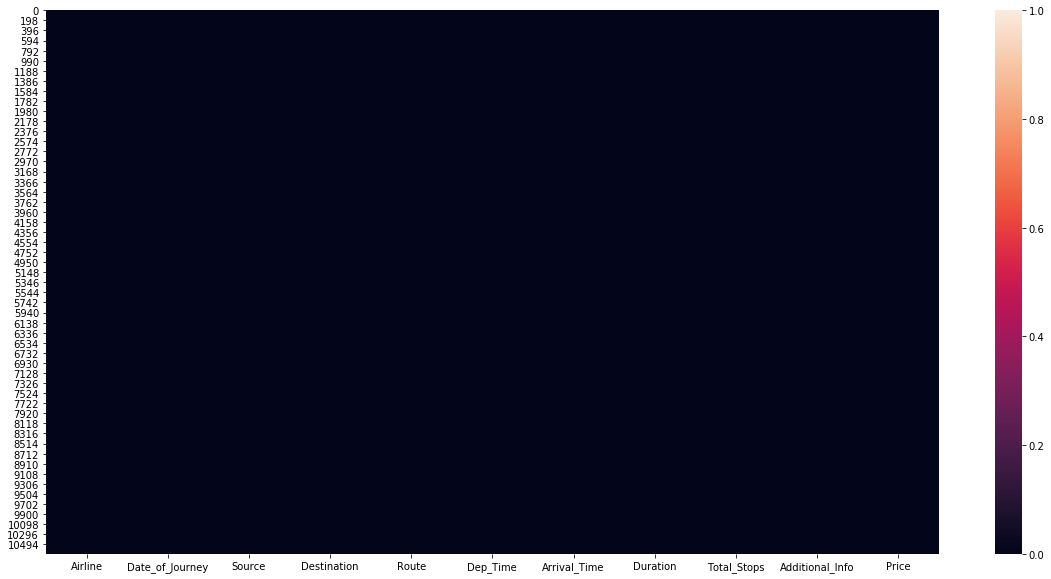

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull())

We can see that there are null values but not showing in this graph as there are  only 2 null values in the data set of more than 10000 rows.

so first we deal with that values.

In [14]:
df_train.dropna(inplace=True)

In [15]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


Now there is no null value in data


No lets covert day_of_journey  column in weekdays as ticket price depends on day of week.

For that, I've converted the type  of that column in datetype as it is in string by using "pd.to_datetime".

then applied "dt.strftime('%A')" to extract the weekday name. "%A' is used for weekday name. '%a' can also be used to get 3 letters of weekday

In [27]:
df_date=pd.to_datetime(df_train['Date_of_Journey'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-07 00:00:00

In [24]:
df_train["day"]=df_date.dt.strftime('%A')
print(df_train["day"])

0           Sunday
1         Saturday
2           Friday
3         Thursday
4         Thursday
           ...    
10678    Wednesday
10679     Saturday
10680     Saturday
10681     Thursday
10682     Thursday
Name: day, Length: 10682, dtype: object


drop column Date_of_journey as it is of no use now. we have extracted weekdays from it in column 'day'


In [33]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [34]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday


# Univariate analysis

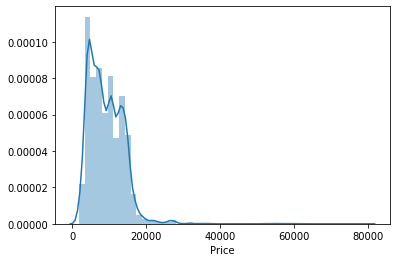

In [35]:
sns.distplot(df_train['Price'])

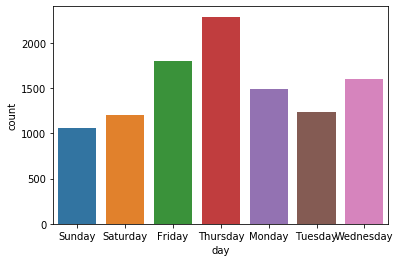

In [36]:
sns.countplot(df_train['day'])

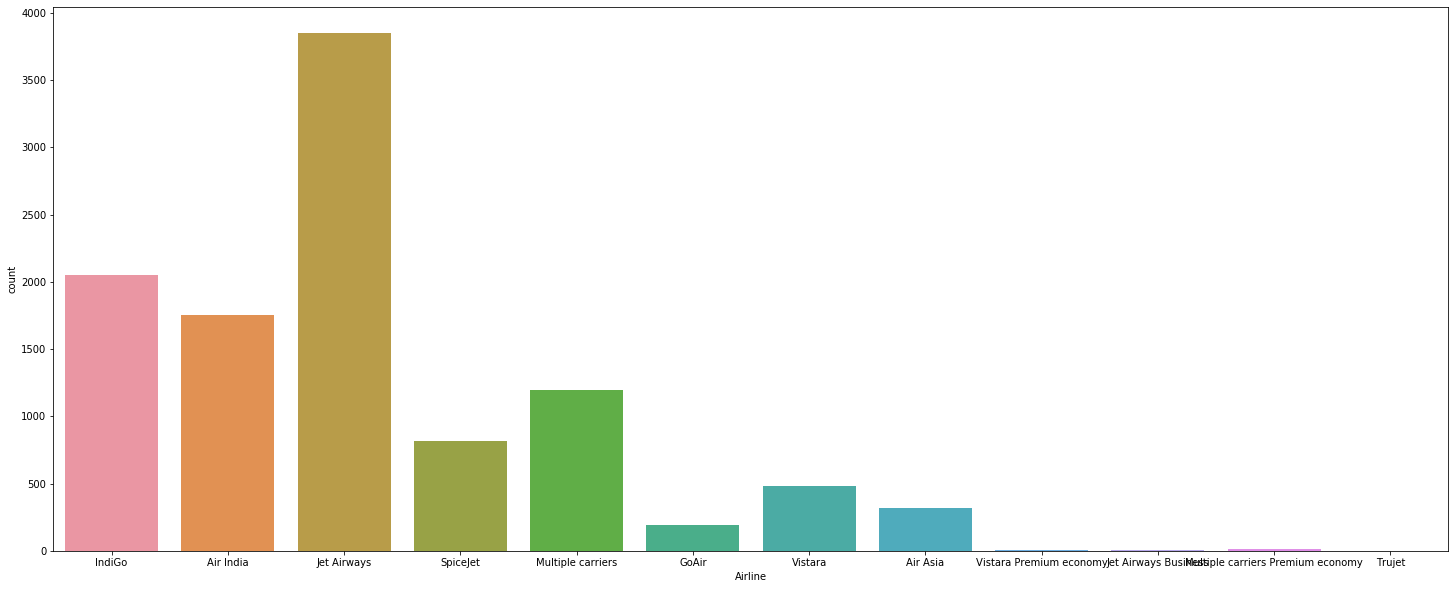

In [39]:
plt.figure(figsize=(25,10))
sns.countplot(df_train['Airline'])

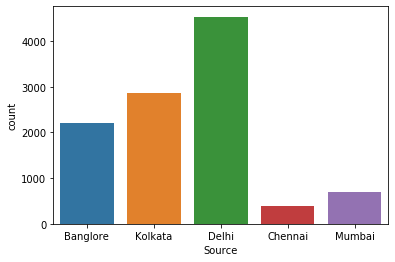

In [41]:
sns.countplot(df_train['Source'])

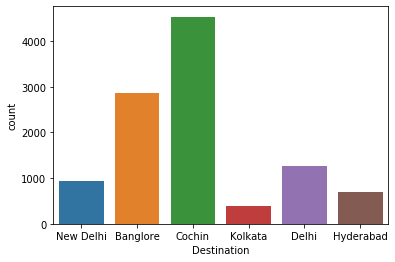

In [42]:
sns.countplot(df_train['Destination'])

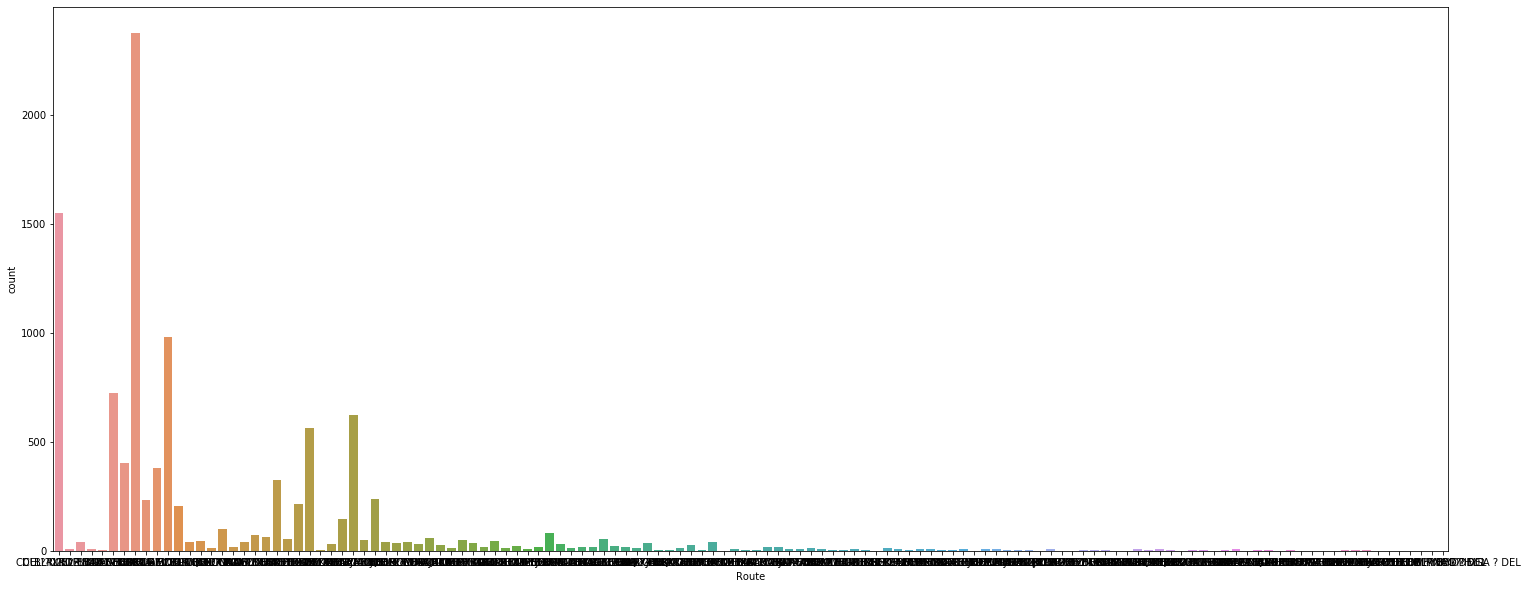

In [49]:
plt.figure(figsize=(25,10))
sns.countplot(df_train['Route'],orient='h')

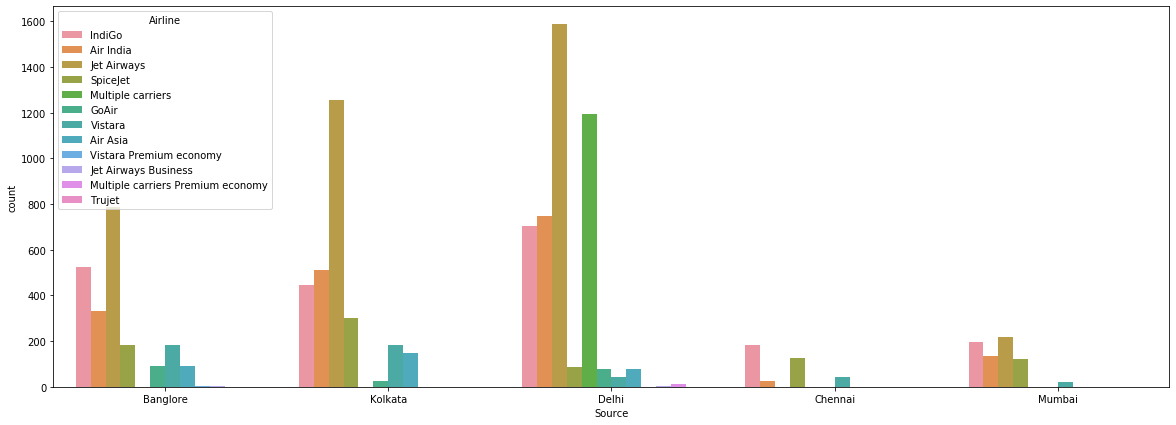

In [54]:
plt.figure(figsize=(20,7))
sns.countplot(x="Source",hue="Airline",data=df_train)

# Conclusion

Maximum number of flights are on Thursday.

Jet Airways has the maximum number of flights in given duration.

Jet Airways has maximun number of flights sourced from Delhi.

Delhi is where maximum number of flights take off followed by Kolkata.

Cochin is the  destination of most number flights followed by Banglore.

# Bivariant Analysis

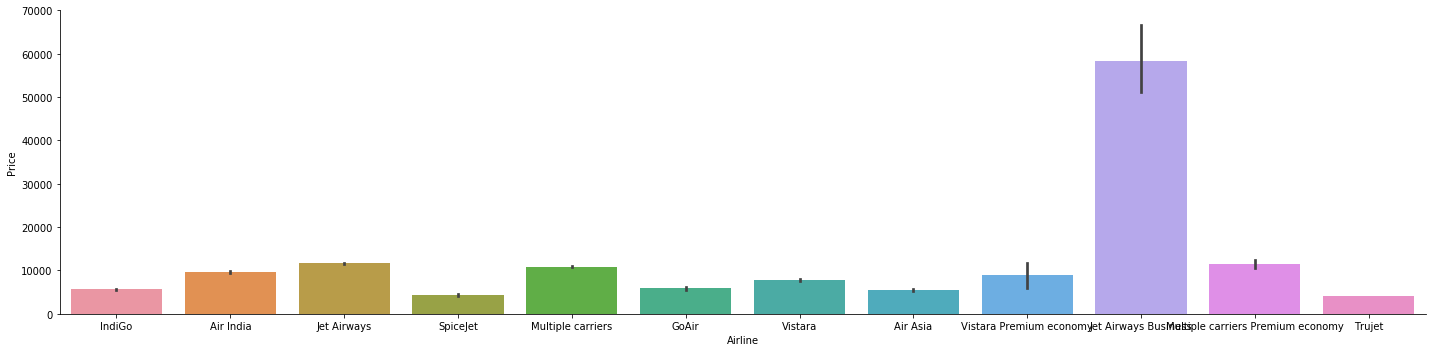

In [60]:
sns.catplot(x='Airline',y='Price',data=df_train,kind='bar',aspect=4)

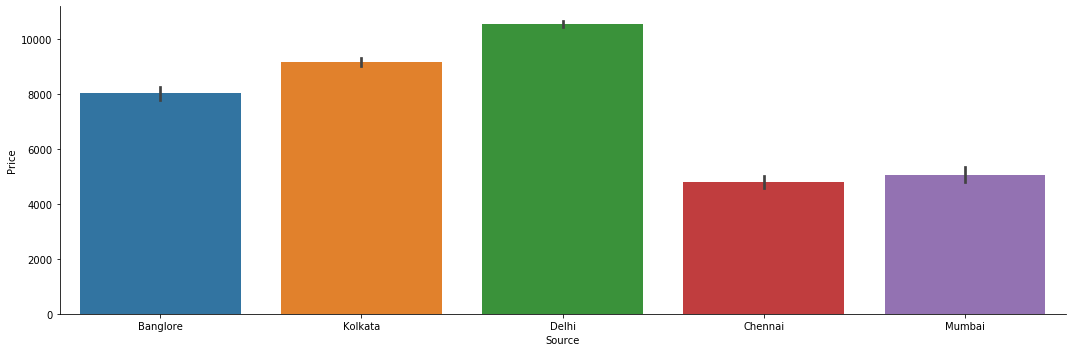

In [65]:
sns.catplot(x='Source',y='Price',data=df_train,kind='bar',aspect=3)

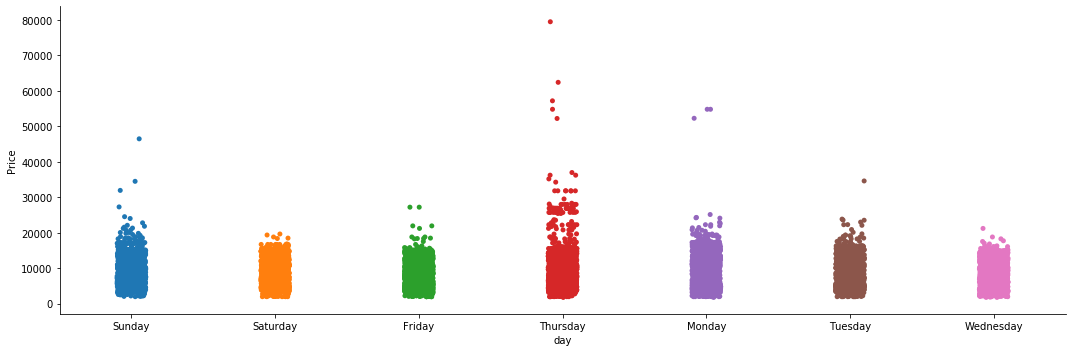

In [69]:
sns.catplot(x='day',y='Price',data=df_train,kind='strip',aspect=3)

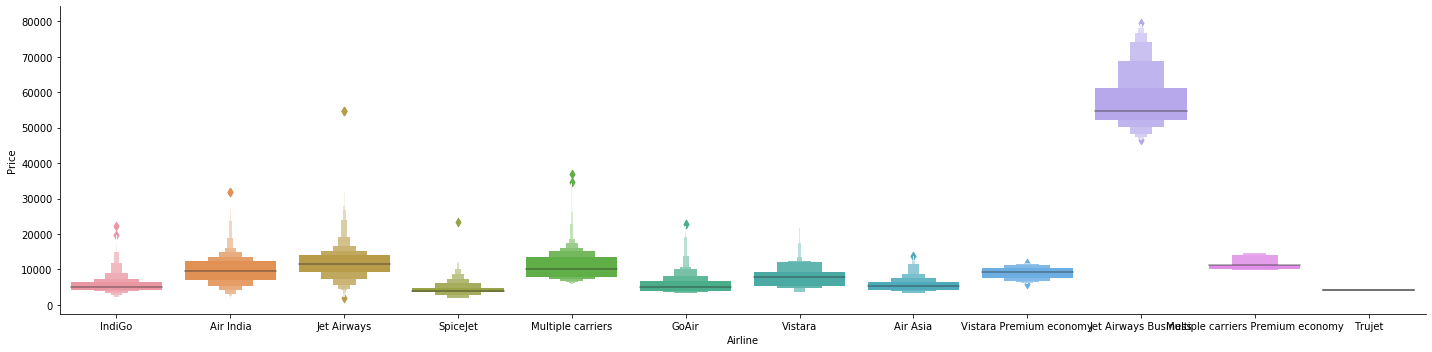

In [73]:
# just other  way of ploting.

sns.catplot(x='Airline',y='Price',data=df_train,kind='boxen',aspect=4)

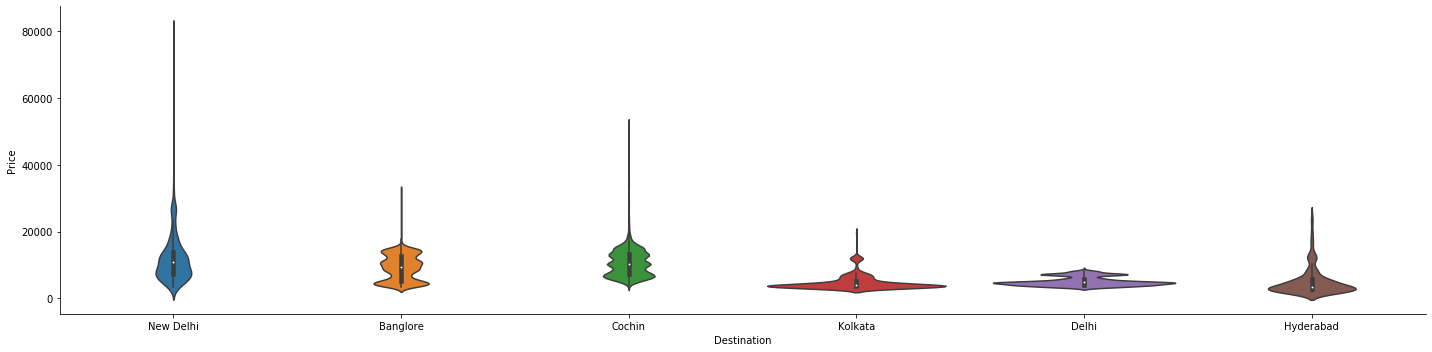

In [74]:
sns.catplot(x='Destination',y='Price',data=df_train,kind='violin',aspect=4)

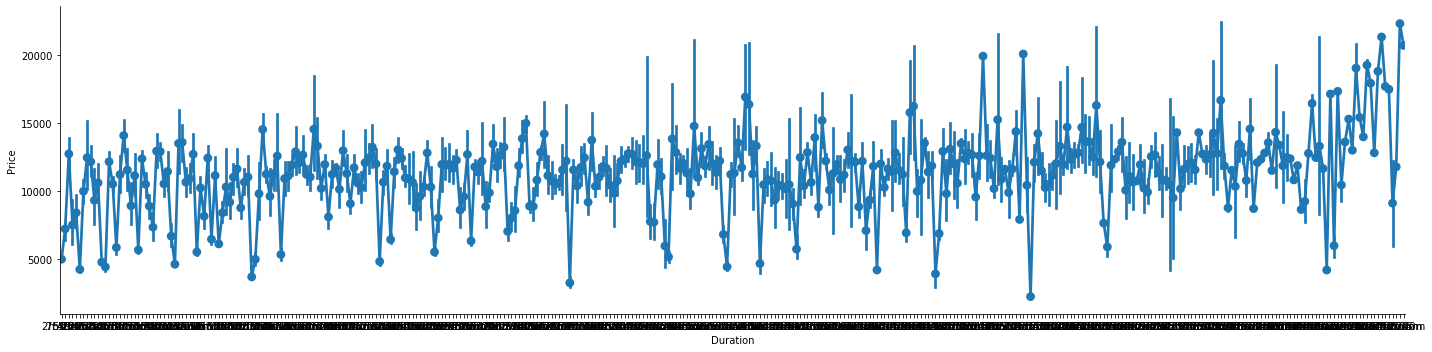

In [77]:
sns.catplot(x='Duration',y='Price',data=df_train,kind='point',aspect=4)

# Conclusion

Jet Airways charges highest amongst other carriers.

Highest Average prices for tickest are from Delhi as it most favoured Source for flights.

Thursday has the highest cost for a ticket.

# Preprocessing


In [84]:
# importing library to encode string varibles into integers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_train['Airline']=le.fit_transform(df_train['Airline'])
df_train['Source']=le.fit_transform(df_train['Source'])
df_train['Destination']=le.fit_transform(df_train['Destination'])
df_train['Route']=le.fit_transform(df_train['Route'])
df_train['Dep_Time']=le.fit_transform(df_train['Dep_Time'])
df_train['Arrival_Time']=le.fit_transform(df_train['Arrival_Time'])
df_train['Duration']=le.fit_transform(df_train['Duration'])
df_train['Total_Stops']=le.fit_transform(df_train['Total_Stops'])
df_train['Additional_Info']=le.fit_transform(df_train['Additional_Info'])
df_train['day']=le.fit_transform(df_train['day'])

In [85]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day
0,3,0,5,18,211,233,240,4,8,3897,3
1,1,3,0,84,31,906,336,1,8,7662,2
2,4,2,1,118,70,413,106,1,8,13882,0
3,3,3,0,91,164,1324,311,0,8,6218,4
4,3,0,5,29,149,1237,303,0,8,13302,4


In [89]:
# Checking the data type

df_train.dtypes

Airline            int64
Source             int64
Destination        int64
Route              int64
Dep_Time           int64
Arrival_Time       int64
Duration           int64
Total_Stops        int64
Additional_Info    int64
Price              int64
day                int32
dtype: object

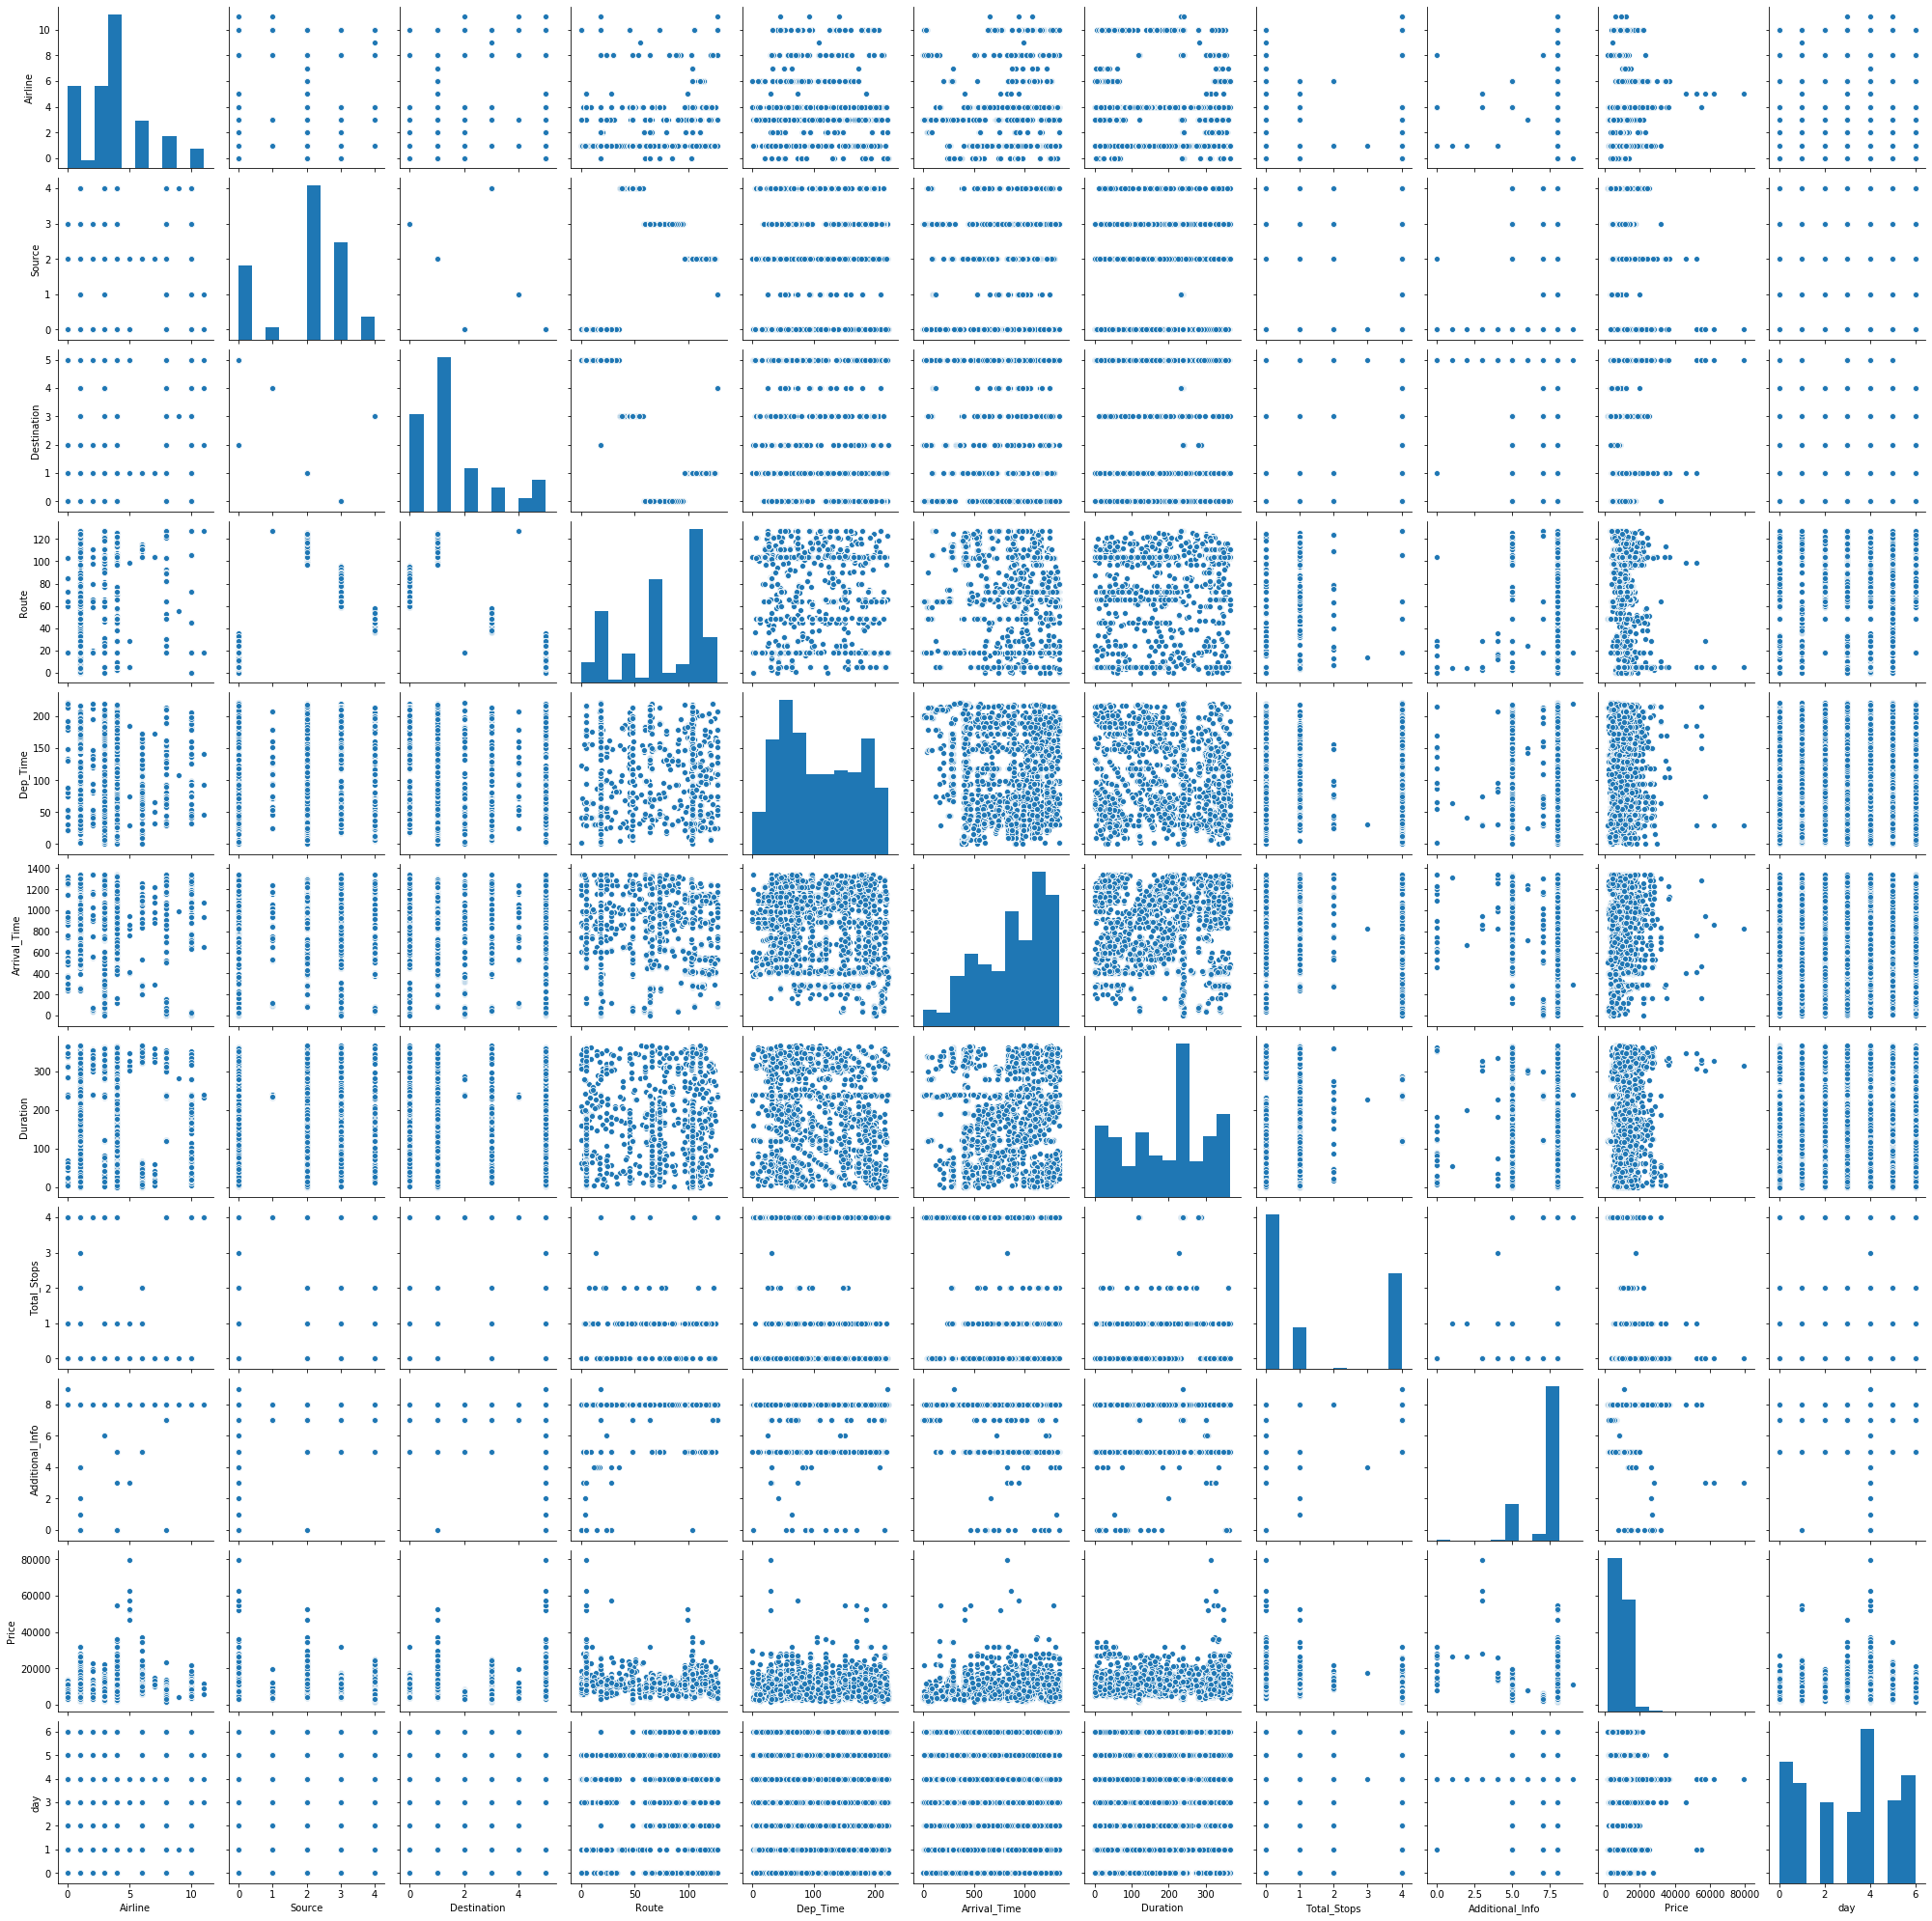

In [87]:
sns.pairplot(data=df_train)

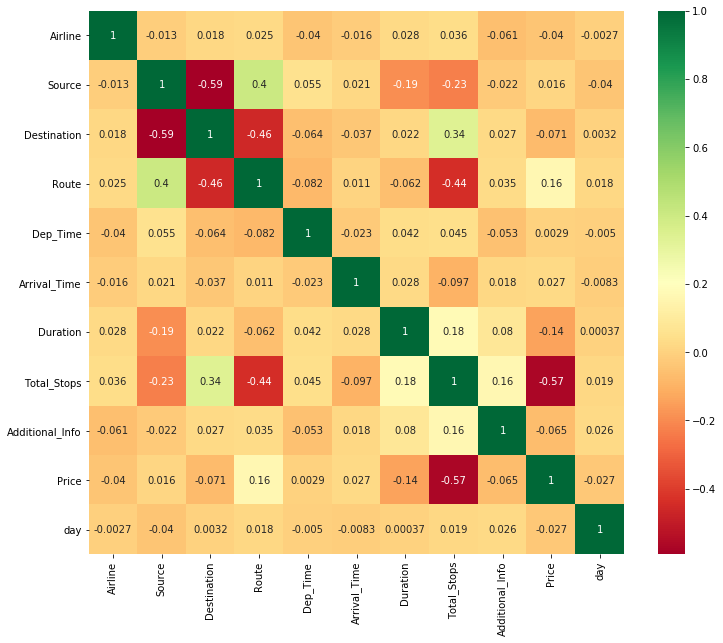

In [96]:
# Finds correlation between each other

plt.figure(figsize = (12,10))

sns.heatmap(df_train.corr(),annot=True,cmap = "RdYlGn")

In [91]:
# Lets divide the data in to  input and target variables

x=df_train.drop(["Price"],axis=1)

y=df_train["Price"]


In [92]:
# normalizing the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [93]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [98]:
# for finding best random state  as parameter

max_r_score=0
for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        y_pred = lr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print("Max r2 score corresponding to ",final_r_state," is",max_r_score)

r2_score corresponding to random state  42 is:  0.3744361398727072
r2_score corresponding to random state  43 is:  0.333765030857486
r2_score corresponding to random state  44 is:  0.34428832209095417
r2_score corresponding to random state  45 is:  0.34839642196843157
r2_score corresponding to random state  46 is:  0.3754381927857926
r2_score corresponding to random state  47 is:  0.3761458892551933
r2_score corresponding to random state  48 is:  0.3383436103440457
r2_score corresponding to random state  49 is:  0.3538342725041256
r2_score corresponding to random state  50 is:  0.361678424675114
r2_score corresponding to random state  51 is:  0.3880988766602741
r2_score corresponding to random state  52 is:  0.36403577287134803
r2_score corresponding to random state  53 is:  0.36507307931926936
r2_score corresponding to random state  54 is:  0.3601397183389441
r2_score corresponding to random state  55 is:  0.3451173536412965
r2_score corresponding to random state  56 is:  0.3269726237

As we can see that r2 score is highest at random state 98, so therfore we use this for further processing.

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=98)

In [100]:
LR=LinearRegression()
LS=Lasso(random_state=98)
RD=Ridge(random_state=98)
KNR=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=98)
RFR=RandomForestRegressor(random_state=98)
GBR=GradientBoostingRegressor(random_state=98)
ABR=AdaBoostRegressor(random_state=98)

In [102]:
models = []
models.append(('LinearRegression', LR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('KNeighborseRegressor',KNR))
models.append(('SVR', SV))
models.append(('DecisionTreeRegressor', DTR))
models.append(('RandomForestRegressor', RFR))
models.append(('GradientBoostingRegressor', GBR))
models.append(('AdaBoostRegressor',ABR))

In [103]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    r2_scr=r2_score(y_test,pred)
    print('R2_score = ',r2_scr)
    R2_score.append(r2_scr)
    
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root Mean Square Error = ",rmse)
    RMSE.append(rmse) 
    
    
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.388219765887324
Mean_Squared_Error = 11193427.855112135
Root Mean Square Error =  3345.658060100006
Cross_Val_Score =  0.3548834959443642



********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=98,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.3882084228033469
Mean_Squared_Error = 11193635.393677576
Root Mean Square Error =  3345.689076061548
Cross_Val_Score =  0.35488778780781616



********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=98, solver='auto', tol=0.001)
R2_score =  0.3882268602123333
Mean_Squared

In [104]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Root Mean Square Error': RMSE, 'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Root Mean Square Error,Cross_val_score
0,LinearRegression,0.388220,1.119343e+07,3345.658060,0.354883
1,Lasso,0.388208,1.119364e+07,3345.689076,0.354888
2,Ridge,0.388227,1.119330e+07,3345.638662,0.354884
3,KNeighborseRegressor,0.701792,5.456158e+06,2335.842068,0.695037
4,SVR,0.049323,1.739406e+07,4170.618142,0.037509
5,DecisionTreeRegressor,0.664403,6.140248e+06,2477.952472,0.711953
6,RandomForestRegressor,0.800184,3.655932e+06,1912.049172,0.807181
7,GradientBoostingRegressor,0.733189,4.881697e+06,2209.456337,0.739699
8,AdaBoostRegressor,-0.169139,2.139113e+07,4625.054222,0.115502


From here we can select Random Forest Regressor as our final model s it has highest r2_score

In [106]:
# for saving our model

from sklearn.externals import joblib
joblib.dump(RFR,"Flight_Price_Prediction.obj")

['Flight_Price_Prediction.obj']

In [108]:
# testing our model

model=joblib.load("Flight_Price_Prediction.obj")
model.predict(x_test)

array([ 3203.82433333, 13786.56      ,  4194.418     , ...,
        8067.0547619 ,  9044.48      ,  4688.15533333])

# Complete